In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
def clean(data):
    
    
    data['term']=data['term'].str[:3].astype(int)
    
    data.drop(["sub_grade","issue_d","pymnt_plan","url","desc","title","zip_code",
                "addr_state","earliest_cr_line",'initial_list_status',
                "last_pymnt_d","last_credit_pull_d","application_type",
                'Unnamed: 0','application_type'],axis=1,inplace=True)
    
    
    le=LabelEncoder()
    data["grade"]=le.fit_transform(data["grade"])
    data["verification_status"]=le.fit_transform(data["verification_status"])
    data['loan_status']=le.fit_transform(data['loan_status'])
    
    data.fillna(0,inplace=True)
    
    data1=data.iloc[:,:36]
    data2=data.iloc[:,61]
    data3=data.iloc[:,88]
    data1["charged_within_12_mths"]=data2
    data1["pub_rec_bankruptcies"]=data3
    data=data1
    
    data.drop(['last_pymnt_amnt','collections_12_mths_ex_med', 'mths_since_last_major_derog',
           'charged_within_12_mths',],axis=1,inplace=True)
    
    data['Interest_amount_paid']=data['total_pymnt']-data['loan_amnt']
    data['Interest_amount_to_be_paid']=data['installment']*6
    
    data['Defaulter']=data['loan_amnt']
    
    for i in range(len(data)):
        if(data['Interest_amount_paid'][i]>=data['Interest_amount_to_be_paid'][i]):
            data['Defaulter'][i]=0
        else:
            data['Defaulter'][i]=1
            
    data.drop(['policy_code','collection_recovery_fee','recoveries',
               'total_rec_late_fee'],axis=1,inplace=True)
    
    return data

In [66]:
def ml(data):
    train=data.drop("loan_status",axis=1)
    test=data["loan_status"]
    
    train.drop(['id','funded_amnt_inv','installment','dti','delinq_2yrs','inq_last_6mths',
            'mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec',
           'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv'
            ,'next_pymnt_d'],axis=1,inplace=True)
    
    
    sc=StandardScaler()
    train=sc.fit_transform(train)
    
    
    x_train,x_test,y_train,y_test=train_test_split(train,test)
    
    
    alg1=RandomForestClassifier(n_estimators=50,random_state=0)
    alg1.fit(x_train,y_train)
    alg2=DecisionTreeClassifier()
    alg2.fit(x_train,y_train)
    alg4=GaussianNB()
    alg4.fit(x_train,y_train)
    alg5=KNeighborsClassifier()
    alg5.fit(x_train,y_train)
    
    y_pred1=alg1.predict(x_test)
    y_pred2=alg2.predict(x_test)
    y_pred4=alg4.predict(x_test)
    y_pred5=alg5.predict(x_test)
    
    
    
    #Random Forest
    rf_cr=classification_report(y_pred1,y_test)
    print(f"Random Forest:\n {rf_cr}")
    
    #Decision Tree
    dt_cr=classification_report(y_pred2,y_test)
    print(f"Decision Tree:\n {dt_cr}")
    
    #Naive Bayes
    nb_cr=classification_report(y_pred4,y_test)
    print(f"Naive Bayes:\n {nb_cr}")
    
    #KNN
    k_cr=classification_report(y_pred5,y_test)
    print(f"KNN:\n {k_cr}")
    
    
    return rf_cr,dt_cr,nb_cr,k_cr

In [72]:
def analysis(data):
    print(f"Shape: {data.shape}\n")
    
    print(f"Correlation:\n {data.corr( )}\n")
    
    print(f"Columns Name: {data.columns}\n")
    
    plt.figure(figsize=(25,25))
    sns.heatmap(data.corr(),annot=True)
    plt.show()
    
    print(f"Data Types: {data.dtypes}\n")
    
    #Outliers Detection
    mean,std=np.mean(data['loan_amnt']),np.std(data['loan_amnt'])
    z_score=np.abs((data['loan_amnt']-mean)/std)
    threshold=3
    good=z_score<threshold
    print(f'Rejection: {(~good).sum()} points')

    from scipy.stats import norm
    print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
    visual_scatter=np.random.normal(size=data['loan_amnt'].size)

    plt.figure(figsize=(20,10))
    plt.scatter(data['loan_amnt'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
    plt.scatter(data['loan_amnt'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
    plt.legend()
    plt.show()
    
    #Outliers Detection
    mean,std=np.mean(data['funded_amnt']),np.std(data['funded_amnt'])
    z_score=np.abs((data['funded_amnt']-mean)/std)
    threshold=3
    good=z_score<threshold
    print(f'Rejection: {(~good).sum()} points')

    from scipy.stats import norm
    print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
    visual_scatter=np.random.normal(size=data['funded_amnt'].size)

    plt.figure(figsize=(20,10))
    plt.scatter(data['funded_amnt'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
    plt.scatter(data['funded_amnt'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
    plt.legend()
    plt.show()
    
    #Outliers Detection
    mean,std=np.mean(data['annual_inc']),np.std(data['annual_inc'])
    z_score=np.abs((data['annual_inc']-mean)/std)
    threshold=3
    good=z_score<threshold
    print(f'Rejection: {(~good).sum()} points')

    from scipy.stats import norm
    print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
    visual_scatter=np.random.normal(size=data['annual_inc'].size)

    plt.figure(figsize=(20,10))
    plt.scatter(data['annual_inc'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
    plt.scatter(data['annual_inc'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
    plt.legend()
    plt.show()
    
    #Outliers Detection
    mean,std=np.mean(data['int_rate']),np.std(data['int_rate'])
    z_score=np.abs((data['int_rate']-mean)/std)
    threshold=4
    good=z_score<threshold
    print(f'Rejection: {(~good).sum()} points')

    from scipy.stats import norm
    print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
    visual_scatter=np.random.normal(size=data['int_rate'].size)

    plt.figure(figsize=(20,10))
    plt.scatter(data['int_rate'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
    plt.scatter(data['int_rate'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
    plt.legend()
    plt.show()
    
    print(f"Description: {data.describe()}")
    
    plt.figure(figsize=(10,5))
    print(sns.lineplot(x='term',y='int_rate',data=data))
    plt.show()
    
    plt.figure(figsize=(10,5))
    print(sns.lineplot(x='loan_amnt',y='annual_inc',data=data))
    plt.show()
    
    plt.figure(figsize=(10,10))
    print(sns.lineplot(x='loan_amnt',y='annual_inc',hue='Defaulter',data=data))
    plt.show()
    
    print(sns.countplot(data['loan_status'], hue=data['grade']))
    plt.show()

In [75]:
data=pd.read_csv("Loan-NGO.csv")

In [76]:
df=pd.DataFrame()
df=clean(data)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [77]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,next_pymnt_d,pub_rec_bankruptcies,Interest_amount_paid,Interest_amount_to_be_paid,Defaulter
0,1077501,1296599,5000,5000,4975.0,36,0.1065,162.87,1,24000.0,...,0.00,5863.155187,5833.84,5000.00,863.16,0,0.0,863.155187,977.22,1
1,1077430,1314167,2500,2500,2500.0,60,0.1527,59.83,2,30000.0,...,0.00,1008.710000,1008.71,456.46,435.17,0,0.0,-1491.290000,358.98,1
2,1077175,1313524,2400,2400,2400.0,36,0.1596,84.33,2,12252.0,...,0.00,3005.666844,3005.67,2400.00,605.67,0,0.0,605.666844,505.98,0
3,1076863,1277178,10000,10000,10000.0,36,0.1349,339.31,2,49200.0,...,0.00,12231.890000,12231.89,10000.00,2214.92,0,0.0,2231.890000,2035.86,0
4,1075358,1311748,3000,3000,3000.0,60,0.1269,67.79,1,80000.0,...,524.06,3513.330000,3513.33,2475.94,1037.39,2016-06-01 00:00:00,0.0,513.330000,406.74,0


Shape: (20001, 33)

Correlation:
                                   id  member_id  loan_amnt  funded_amnt  \
id                          1.000000   0.997592   0.077650     0.084491   
member_id                   0.997592   1.000000   0.074520     0.081298   
loan_amnt                   0.077650   0.074520   1.000000     0.986807   
funded_amnt                 0.084491   0.081298   0.986807     1.000000   
funded_amnt_inv             0.095969   0.092718   0.976369     0.989612   
term                       -0.056552  -0.058879   0.452277     0.436510   
int_rate                    0.065586   0.064009   0.354723     0.345795   
installment                 0.105736   0.102882   0.939047     0.957521   
grade                      -0.039445  -0.041001   0.345615     0.336738   
annual_inc                 -0.001055  -0.003374   0.386233     0.383919   
verification_status         0.039645   0.037093   0.471206     0.466910   
loan_status                 0.104205   0.103262   0.159038     0.1


Columns Name: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'annual_inc',
       'verification_status', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'next_pymnt_d',
       'pub_rec_bankruptcies', 'Interest_amount_paid',
       'Interest_amount_to_be_paid', 'Defaulter'],
      dtype='object')



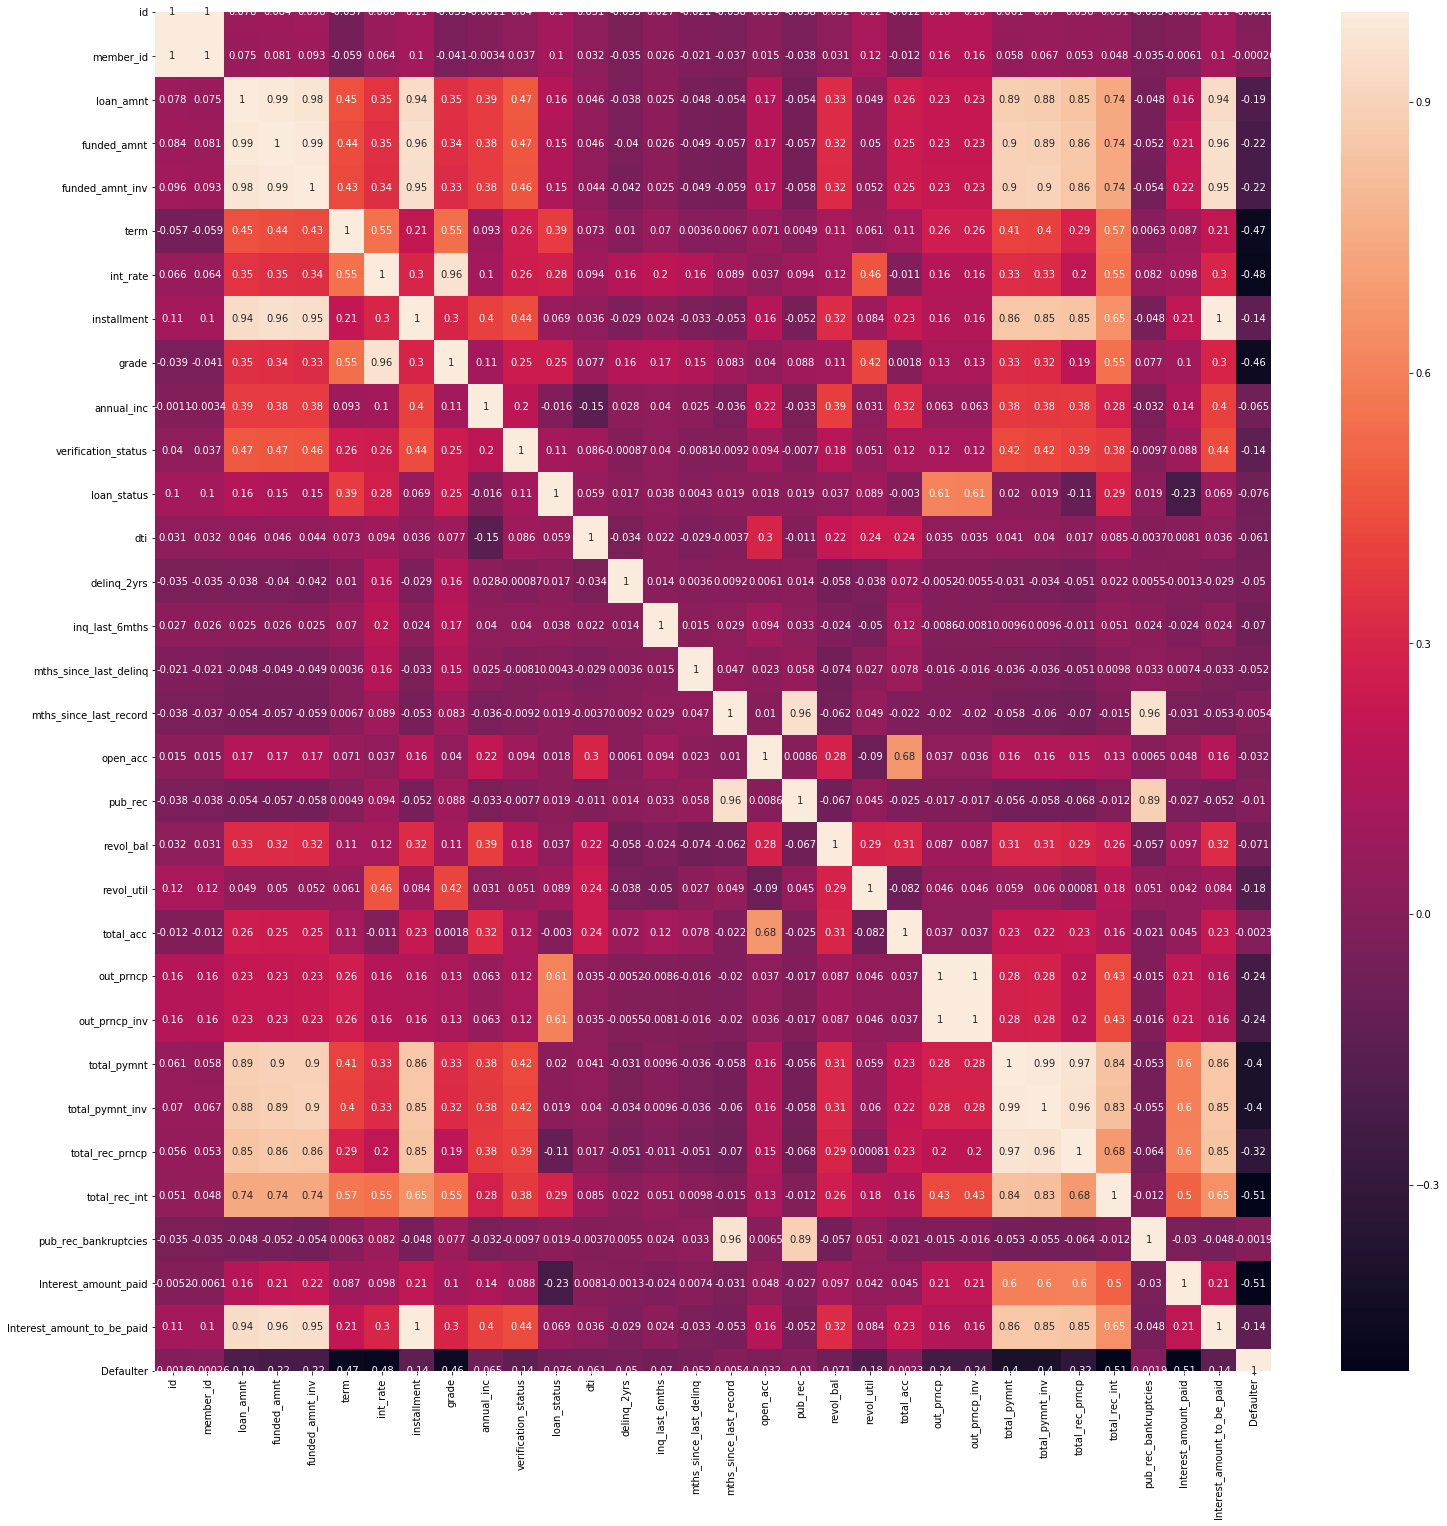

Data Types: id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
grade                           int32
annual_inc                    float64
verification_status             int32
loan_status                     int32
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64


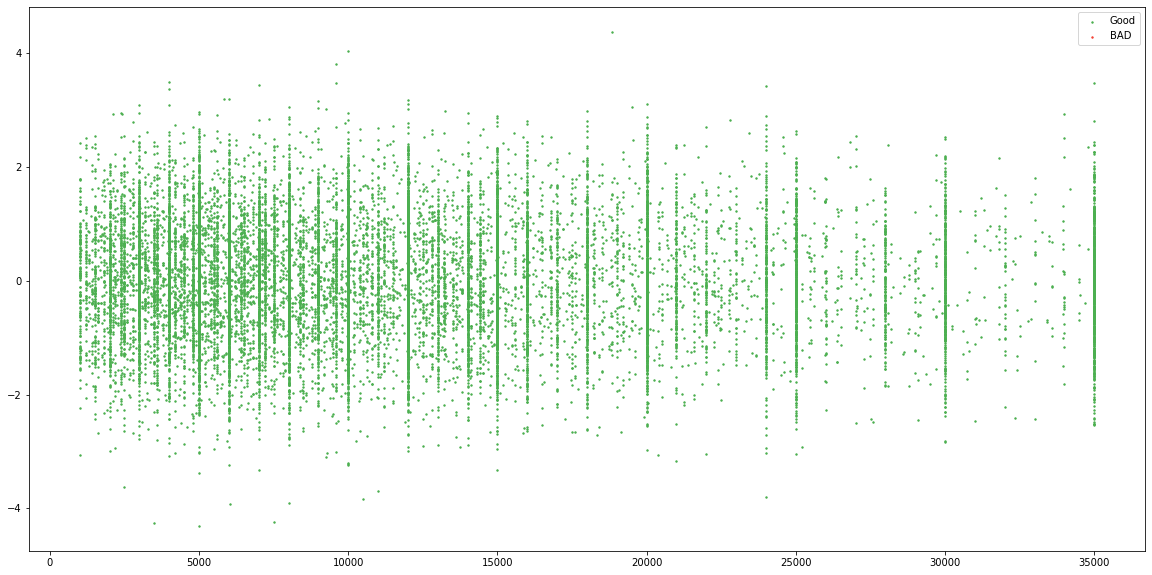

Rejection: 0 points
z_score of 3 corresponds to prob of 0.27%


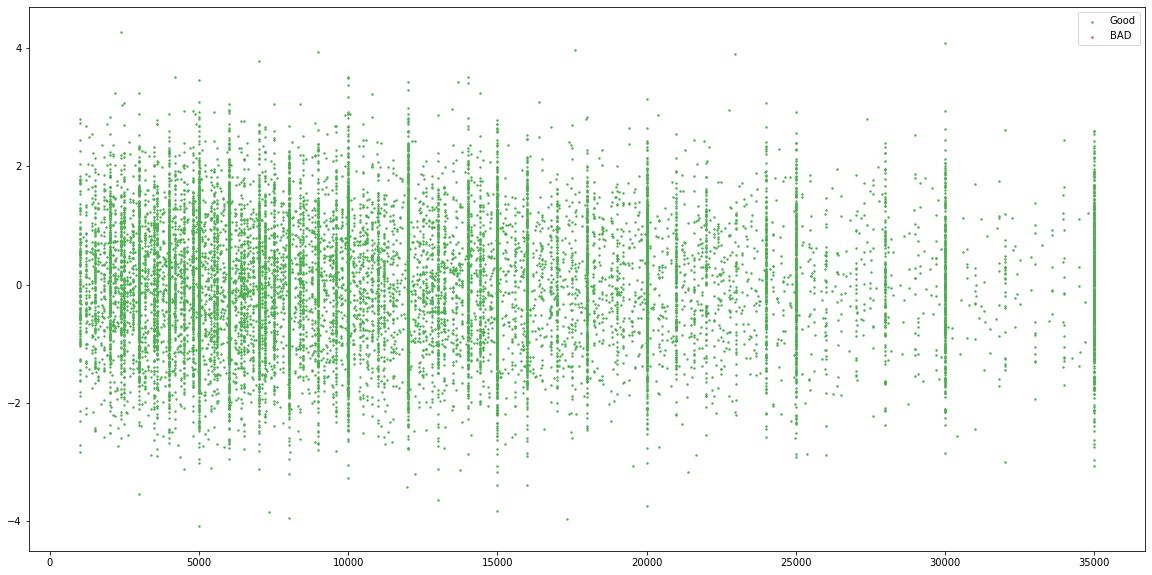

Rejection: 270 points
z_score of 3 corresponds to prob of 0.27%


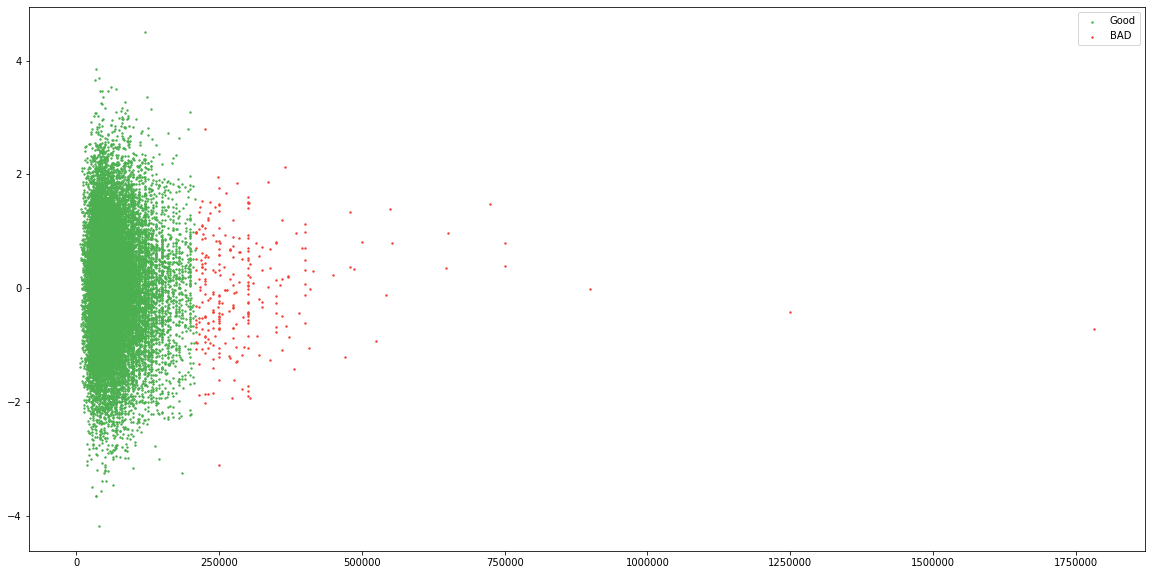

Rejection: 0 points
z_score of 3 corresponds to prob of 0.01%


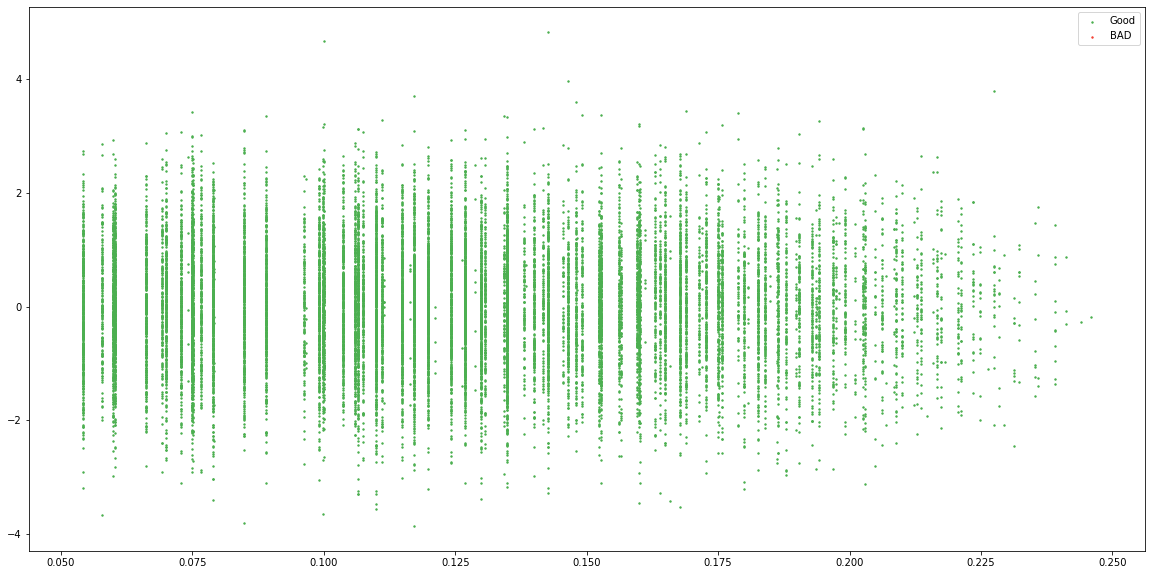

Description:                  id     member_id     loan_amnt   funded_amnt  \
count  2.000100e+04  2.000100e+04  20001.000000  20001.000000   
mean   8.576957e+05  1.067649e+06  12114.208040  11901.292435   
std    1.248789e+05  1.391006e+05   8282.703353   7995.281535   
min    2.967370e+05  2.967340e+05   1000.000000   1000.000000   
25%    7.534010e+05  9.524480e+05   6000.000000   6000.000000   
50%    8.366630e+05  1.045887e+06  10000.000000  10000.000000   
75%    9.877000e+05  1.211354e+06  16000.000000  16000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv          term      int_rate  installment         grade  \
count     20001.000000  20001.000000  20001.000000  20001.00000  20001.000000   
mean      11745.083983     44.437978      0.122931    339.55448      1.592220   
std        7844.460031     11.459431      0.041645    219.44803      1.445375   
min         400.000000     36.000000      0.054200     21.25000      0.000000

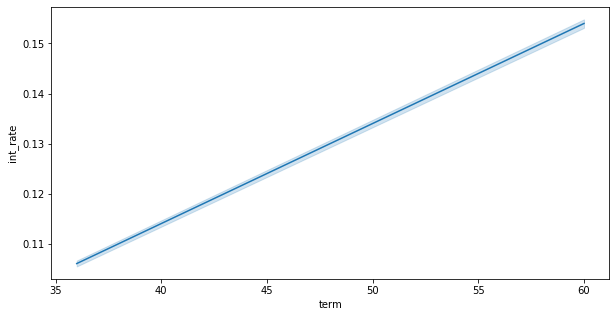

AxesSubplot(0.125,0.125;0.775x0.755)


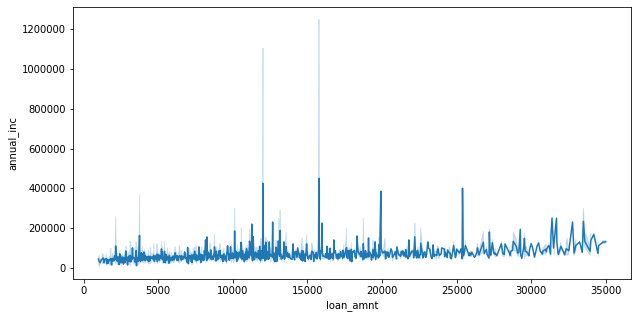

AxesSubplot(0.125,0.125;0.775x0.755)


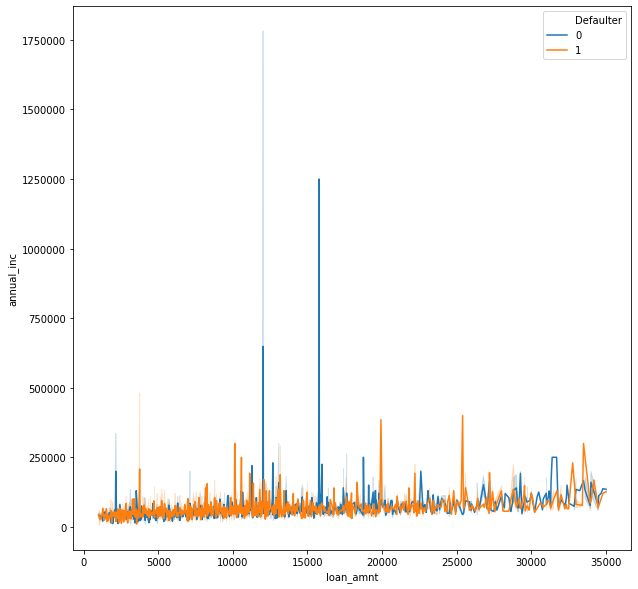

AxesSubplot(0.125,0.125;0.775x0.755)


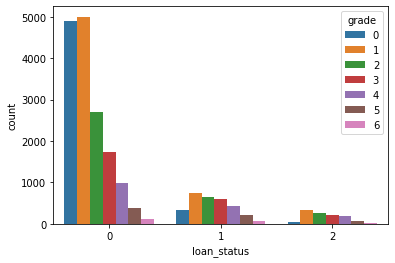

In [73]:
analysis(df)

In [67]:
a,b,c,d=ml(df)


Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4004
           1       0.95      0.99      0.97       713
           2       1.00      1.00      1.00       284

    accuracy                           0.99      5001
   macro avg       0.98      0.99      0.99      5001
weighted avg       0.99      0.99      0.99      5001

Decision Tree:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3973
           1       0.97      0.97      0.97       744
           2       1.00      1.00      1.00       284

    accuracy                           0.99      5001
   macro avg       0.99      0.99      0.99      5001
weighted avg       0.99      0.99      0.99      5001

Naive Bayes:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      4005
           1       0.67      0.81      0.73       623
           2       1.00      